In [44]:
#! pip install imbalanced-learn

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv(r'C:\Users\dvale\TFM\Data\all_variables.csv')

In [47]:
print(data.shape)
print(data.columns)

(39852, 19)
Index(['Unnamed: 0', 'id', 'weight', 'material_deprivation', 'sex', 'age',
       'civil_status', 'familial_status', 'region', 'population_density',
       'citizenship', 'tenure_status', 'education_level', 'working_status',
       'working_status_agg', 'occupation', 'economic_sector', 'years_worked',
       'hours_week_worked'],
      dtype='object')


In [48]:
data = data.drop(['Unnamed: 0', 'id', 'weight'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39852 entries, 0 to 39851
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   material_deprivation  39852 non-null  object
 1   sex                   39852 non-null  object
 2   age                   39852 non-null  int64 
 3   civil_status          39852 non-null  object
 4   familial_status       39852 non-null  object
 5   region                39852 non-null  object
 6   population_density    39852 non-null  object
 7   citizenship           39852 non-null  object
 8   tenure_status         39852 non-null  object
 9   education_level       39852 non-null  object
 10  working_status        39852 non-null  object
 11  working_status_agg    39852 non-null  object
 12  occupation            39852 non-null  object
 13  economic_sector       39852 non-null  object
 14  years_worked          39852 non-null  int64 
 15  hours_week_worked     39852 non-null

In [49]:
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Self-employed', 'Minor'], dtype=object)

In [50]:
data.working_status = np.where(data.working_status == 'Self-employed', 'Employed', data.working_status)
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Minor'], dtype=object)

In [51]:
data = data.drop(['working_status_agg'], axis=1)

In [52]:
scaler = StandardScaler()

num_var = data[['age', 'years_worked', 'hours_week_worked']]
scaler.fit(num_var)
scaled_var = pd.DataFrame(scaler.transform(num_var), columns=num_var.columns)

data.age = scaled_var.age
data.years_worked = scaled_var.years_worked
data.years_worked = scaled_var.years_worked

data.head()

,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,economic_sector,years_worked,hours_week_worked
0,No,Male,1.088573,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,Economically inactive/unemployed,1.831752,0
1,No,Female,1.002616,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,Economically inactive/unemployed,-0.922952,0
2,No,Female,1.174531,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,Economically inactive/unemployed,0.178930,0
3,No,Male,0.658786,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,Economically inactive/unemployed,1.097164,0
4,No,Female,0.400914,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,Economically inactive/unemployed,0.791086,0


In [53]:
def get_dummies(df):
    new_df = pd.DataFrame()
    for c in df.columns:
        if type(df[c][0]) == type('string'):
            dummy_df = pd.get_dummies(df[c])
            for dummy_column in dummy_df.columns:
                new_df[c + '_' + dummy_column] = dummy_df[dummy_column]
        else:
            new_df[c] = df[c]
    return new_df

In [54]:
data_final = get_dummies(data[data.columns[1:]])

data_final.head()

,sex_Female,sex_Male,age,civil_status_Divorced,civil_status_Married,civil_status_Married 'de facto',civil_status_Minor,civil_status_Never married,civil_status_Separated,civil_status_Widowed,...,economic_sector_Mining and quarrying,economic_sector_Other service activities,"economic_sector_Professional, scientific and technical activities",economic_sector_Public administration and defence; compulsory social security,economic_sector_Real estate activities,economic_sector_Transportation and storage,"economic_sector_Water supply; sewerage, waste management and remediation activities",economic_sector_Wholesale and retail trade; repair of motor vehicles and motorcycles,years_worked,hours_week_worked
0,0,1,1.088573,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.831752,0
1,1,0,1.002616,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.922952,0
2,1,0,1.174531,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.178930,0
3,0,1,0.658786,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.097164,0
4,1,0,0.400914,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.791086,0


In [55]:
data_final['is_minor'] = data_final.civil_status_Minor
data_final = data_final.drop(['civil_status_Minor', 
                               'working_status_Minor', 
                               'education_level_Minor', 
                               'occupation_Economically inactive', 
                               'economic_sector_Economically inactive/unemployed'], axis=1)

In [56]:
data_final['material_deprivation'] = data.material_deprivation.map({'Yes': 1, 'No': 0})

count_yes = len(data_final[data_final.material_deprivation == 1])
count_no = len(data_final[data_final.material_deprivation == 0])
freq_yes = (count_yes/(count_yes+count_no))*100
freq_no = (count_no/(count_yes+count_no))*100

print('''Has material deprivation: {}%
Does not have material deprivation: {}%'''.format(round(freq_yes, 2), round(freq_no, 2)))

Has material deprivation: 4.61%
Does not have material deprivation: 95.39%


In [57]:
X = data_final.drop(['material_deprivation'], axis=1)
y = data_final.material_deprivation

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [58]:
rfe_estimator = LogisticRegression(max_iter=1000)
rfe = RFE(rfe_estimator)
rfe = rfe.fit(X_train, y_train)

In [59]:
selected_columns = [X_train.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]

In [60]:
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [61]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9503
           1       0.37      0.04      0.08       460

    accuracy                           0.95      9963
   macro avg       0.66      0.52      0.53      9963
weighted avg       0.93      0.95      0.93      9963



In [63]:
proba_material_deprivation = [proba[1] for proba in logreg.predict_proba(X_test)]

In [64]:
testing_data = X_test.copy()
testing_data['material_deprivation'] = y_test.copy()
testing_data['proba_material_deprivation'] = proba_material_deprivation

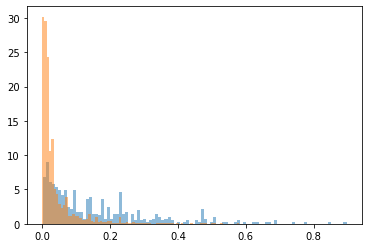

In [65]:
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 1].reset_index(), density=True, alpha=0.5)
plt.hist(x='proba_material_deprivation', bins=100, data=testing_data[testing_data.material_deprivation == 0].reset_index(), density=True, alpha=0.5);